Reinforcement Learning Homework 1

Aly Khater

#Greedy

In [20]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [21]:
class Bandit:
  def __init__(self, p=None):
    if p is None:
      self.p = np.random.random()
    else:
      self.p = p
    self.p_hat = 0
    self.N = 0

  def pull(self):
    return int(np.random.random() < self.p)

  def update(self,x):
    self.N += 1
    self.p_hat = ((self.N - 1) * self.p_hat + x) / self.N

  def __call__(self):
    return self.p_hat

In [22]:
N_TRIALS = 10000
epsilon = 0.2
p = [0.1,0.9]

def randargmax(b):
  return np.argmax(
      np.random.random(b.shape) * (b==b.max())
  )

def greedy_strategy(slots):
  n_slots = len(slots)
  b = np.array([s() for s in slots])
  j = randargmax(b)
  x = slots[j].pull()
  slots[j].update(x)
  return j, x

slots = [Bandit(p[j]) for j in range(len(p))]
js = []

for i in range(100):
  j, x = greedy_strategy(slots)
  print(f'{i:3} - sm {j} result={x} prob={slots[j]():5.3}')

  0 - sm 0 result=0 prob=  0.0
  1 - sm 0 result=0 prob=  0.0
  2 - sm 0 result=0 prob=  0.0
  3 - sm 1 result=1 prob=  1.0
  4 - sm 1 result=0 prob=  0.5
  5 - sm 1 result=0 prob=0.333
  6 - sm 1 result=1 prob=  0.5
  7 - sm 1 result=0 prob=  0.4
  8 - sm 1 result=1 prob=  0.5
  9 - sm 1 result=1 prob=0.571
 10 - sm 1 result=1 prob=0.625
 11 - sm 1 result=1 prob=0.667
 12 - sm 1 result=1 prob=  0.7
 13 - sm 1 result=1 prob=0.727
 14 - sm 1 result=1 prob= 0.75
 15 - sm 1 result=1 prob=0.769
 16 - sm 1 result=1 prob=0.786
 17 - sm 1 result=1 prob=  0.8
 18 - sm 1 result=1 prob=0.812
 19 - sm 1 result=1 prob=0.824
 20 - sm 1 result=1 prob=0.833
 21 - sm 1 result=1 prob=0.842
 22 - sm 1 result=1 prob= 0.85
 23 - sm 1 result=1 prob=0.857
 24 - sm 1 result=1 prob=0.864
 25 - sm 1 result=1 prob= 0.87
 26 - sm 1 result=1 prob=0.875
 27 - sm 1 result=0 prob= 0.84
 28 - sm 1 result=1 prob=0.846
 29 - sm 1 result=1 prob=0.852
 30 - sm 1 result=1 prob=0.857
 31 - sm 1 result=1 prob=0.862
 32 - sm

#Epsilon-greedy with decay proportional to 1/t

In [23]:
class Bandit:
  def __init__(self, m):
    self.m = m
    self.p_hat = 0
    self.N = 0

  def pull(self):
    return self.m + np.random.randn()

  def update(self,x):
    self.N += 1
    self.p_hat = ((self.N - 1) * self.p_hat + x) / self.N

  def __call__(self):
    return self.p_hat


In [24]:
N_TRIALS = 10000
epsilon = 0.2
m = [3, 7, 10]

def epsilon_greedy_strategy(epsilon, slots):
  n_slots = len(slots)
  p = np.random.random()
  if p < epsilon:
    j = np.random.choice(n_slots)
  else:
    j = np.argmax([s() for s in slots])
  x = slots[j].pull()
  slots[j].update(x)

np.random.seed(42)
slots = [Bandit(mi) for mi in m] # Create Bandit objects for each value in m
rewards = []
for t in range(1,N_TRIALS+1):
  epsilon = 1/t
  epsilon_greedy_strategy(epsilon, slots)
  n = np.sum([int(s.p_hat * s.N) for s in slots])
  d = np.sum([s.N for s in slots])
  rewards.append((n/d)/10)

print([int(s.N) for s in slots])
print([np.round(s(), 4) for s in slots])

[9, 2, 9989]
[2.9882, 6.7106, 9.9839]


Expected gain 9.977
Computed expected results is [ 3  7 10]


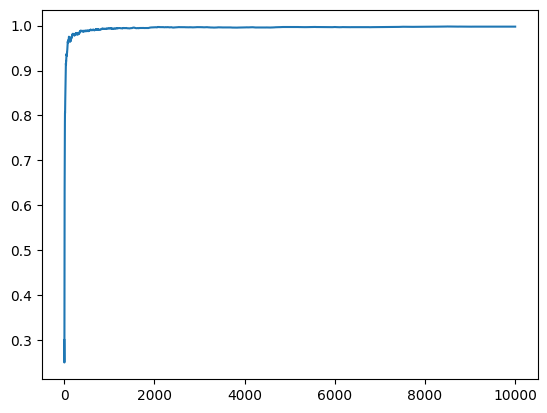

In [25]:
#expected_reward = (1 - epsilon) * np.max(p) + epsilon * (np.mean(p))
expected_reward = [3,7,10]
n = np.sum([int(s.p_hat * s.N) for s in slots])
d = np.sum([s.N for s in slots])
print(f'Expected gain {np.round(n/d, 3)}')
print(f'Computed expected results is {np.round(expected_reward, 3)}')
plt.plot(rewards)

#Optimistic initial values

In [26]:
class Bandit:
  def __init__(self, p=None):
    if p is None:
      self.p = np.random.random()
    else:
      self.p = p
    self.p_hat = 1000
    self.N = 0

  def pull(self):
    return int(np.random.random() < self.p)

  def update(self,x):
    self.N += 1
    self.p_hat = ((self.N - 1) * self.p_hat + x) / self.N

  def __call__(self):
    return self.p_hat

In [27]:
N_TRIALS = 10000
epsilon = 0.2
p = [.1,.9]

def randargmax(b):
  return np.argmax(
      np.random.random(b.shape) * (b==b.max())
  )

def greedy_strategy(slots):
  n_slots = len(slots)
  b = np.array([s() for s in slots])
  j = randargmax(b)
  x = slots[j].pull()
  slots[j].update(x)
  return j,x

slots = [Bandit(p[j]) for j in range(len(p))]
js = []

rewards = []
for _ in range(N_TRIALS+1):
  greedy_strategy(slots)
  n = np.sum([int(s.p_hat * s.N) for s in slots])
  d = np.sum([s.N for s in slots])
  rewards.append(n/d)
#for i in range(100):
#  j, x = greedy_strategy(slots)
#  print(f'{i:3} - sm {j} result={x} prob={slots[j]():5.3}')
print([int(s.N) for s in slots])
print([np.round(s(), 4) for s in slots])

[1, 10000]
[0.0, 0.8962]


Expected gain 0.896
Computed expected results is [ 3  7 10]


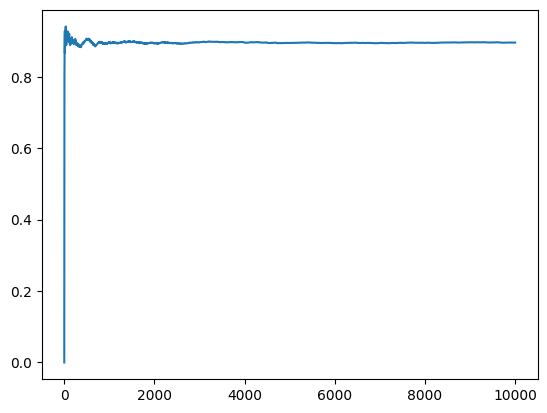

In [28]:
expected_reward = [3,7,10]
n = np.sum([int(s.p_hat * s.N) for s in slots])
d = np.sum([s.N for s in slots])

print(f'Expected gain {np.round(n/d, 3)}')
print(f'Computed expected results is {np.round(expected_reward, 3)}')
plt.plot(rewards)

#UCB1

In [29]:
class Bandit:
  def __init__(self, p=None):
    if p is None:
      self.p = np.random.random()
    else:
      self.p = p
    self.p_hat = 0
    self.N = 0

  def pull(self):
    return int(np.random.random() < self.p)

  def update(self,x):
    self.N += 1
    self.p_hat = ((self.N - 1) * self.p_hat + x) / self.N

  def __call__(self):
    return self.p_hat

In [30]:
N_TRIALS = 10000
epsilon = 0.2
p = [.1,.9]

def ucb1(epsilon, slots):
  n_slots = len(slots)
  p = np.random.random()
  n = np.sum(N_TRIALS)
  sample_means = [s() + np.sqrt(2 * np.log(n) / s.N) for s in slots]
  j = np.argmax(sample_means)
  #sample_means = [s() for s in slots]
  #j = np.argmax(sample_means)
  x = slots[j].pull()
  slots[j].update(x)

np.random.seed(42)
slots = [Bandit(p[i]) for i in range(len(p))]
rewards = []
for _ in range(N_TRIALS):
  ucb1(epsilon, slots)
  n = np.sum([int(s.p_hat * s.N) for s in slots])
  d = np.sum([s.N for s in slots])
  rewards.append(n/d)

print([int(s.N) for s in slots])
print([np.round(s(), 4) for s in slots])
print([np.round(s.p, 4) for s in slots])

<ipython-input-30-395eab803136>:9: RuntimeWarning: divide by zero encountered in scalar divide


[23, 9977]
[0.0435, 0.9025]
[0.1, 0.9]


Expected gain 0.9
Computed expected results is 0.82


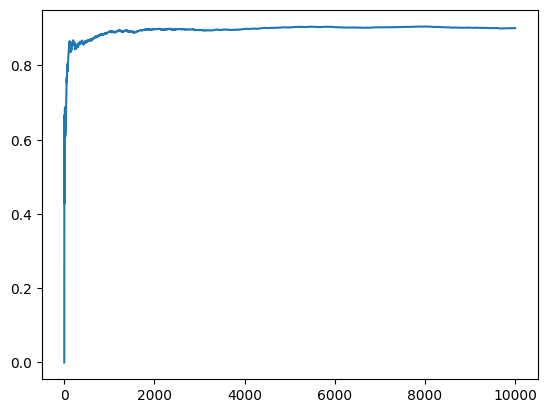

In [31]:
expected_reward = (1 - epsilon) * np.max(p) + epsilon * (np.mean(p))
n = np.sum([int(s.p_hat * s.N) for s in slots])
d = np.sum([s.N for s in slots])
print(f'Expected gain {np.round(n/d, 3)}')
print(f'Computed expected results is {np.round(expected_reward, 3)}')
plt.plot(rewards)

#Thompson Sampling

In [32]:


# True mean rewards of each arm
actual_means = [3, 7, 10]
true_std_dev = 1


# Starting with a prior mean of 0 and precision of 1
arms_params = [[0, 1] for _ in actual_means]

# Running Thompson Sampling for Gaussian rewards
N_TRIALS = 10000
rewards = []

for trial in range(N_TRIALS):
    samples = [
        np.random.normal(mean, 1.0 / np.sqrt(precision))
        for mean, precision in arms_params
    ]

    # Pick the arm with the highest sampled estimate
    best_arm = np.argmax(samples)

    # Pull the chosen arm and get a reward
    reward = np.random.normal(actual_means[best_arm], true_std_dev)

    mean, precision = arms_params[best_arm]
    new_precision = precision + 1
    new_mean = (precision * mean + reward) / new_precision

    arms_params[best_arm] = [new_mean, new_precision]

    # Logging reward
    rewards.append(reward)

# Calculating the expected gain from the estimated mean rewards
n = np.sum([mean * precision for mean, precision in arms_params])
d = np.sum([precision for _, precision in arms_params])
expected_gain = n / d
print(f'Expected gain: {np.round(expected_gain, 3)}')
print(f'Computed expected results are: {np.round(actual_means, 3)}')




Expected gain: 9.994
Computed expected results are: [ 3  7 10]


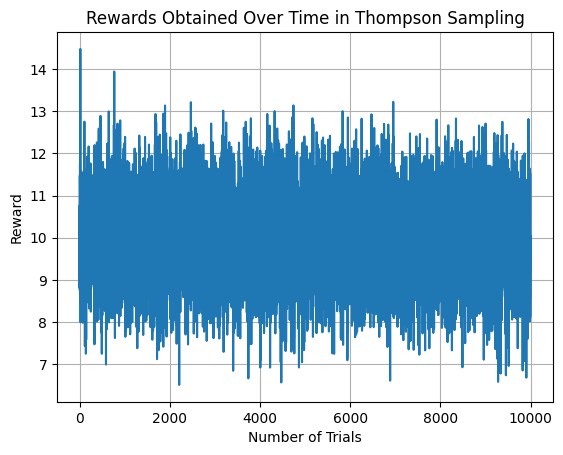

In [33]:
# Plotting the rewards over time
plt.figure()
plt.plot(rewards)
plt.xlabel("Number of Trials")
plt.ylabel("Reward")
plt.title("Rewards Obtained Over Time in Thompson Sampling")
plt.grid(True)
plt.show()

In [34]:
#!unzip src.zip

In [35]:
import sys
sys.path.append('/content/base/')

!ls /content/
import importlib
from base import config_lib  # or from base import config_lib
importlib.reload(config_lib)

assortment	   batch_runner.py  finite_arm	     news_recommendation   simple_example.py
base		   cascading	    graph	     reproduce_figures.py  src.zip
batch_analysis.py  ensemble_nn	    local_runner.py  sample_data


<module 'base.config_lib' from '/content/base/config_lib.py'>

In [36]:
import os
import sys

from base import config_lib

import numpy as np
import pandas as pd
import plotnine as gg

from base.experiment import BaseExperiment
from finite_arm.agent_finite import FiniteBernoulliBanditTS
from finite_arm.env_finite import FiniteArmedBernoulliBandit

sys.path.append(os.getcwd())

In [37]:
probs = [0.1,0.9]
n_steps = 10000
seed = 0

agent = FiniteBernoulliBanditTS(n_arm=len(probs))
env = FiniteArmedBernoulliBandit(probs)
experiment = BaseExperiment(
    agent, env, n_steps=n_steps, seed=seed, unique_id='example')

experiment.run_experiment()

<ipython-input-38-117f6c20d337>:4: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


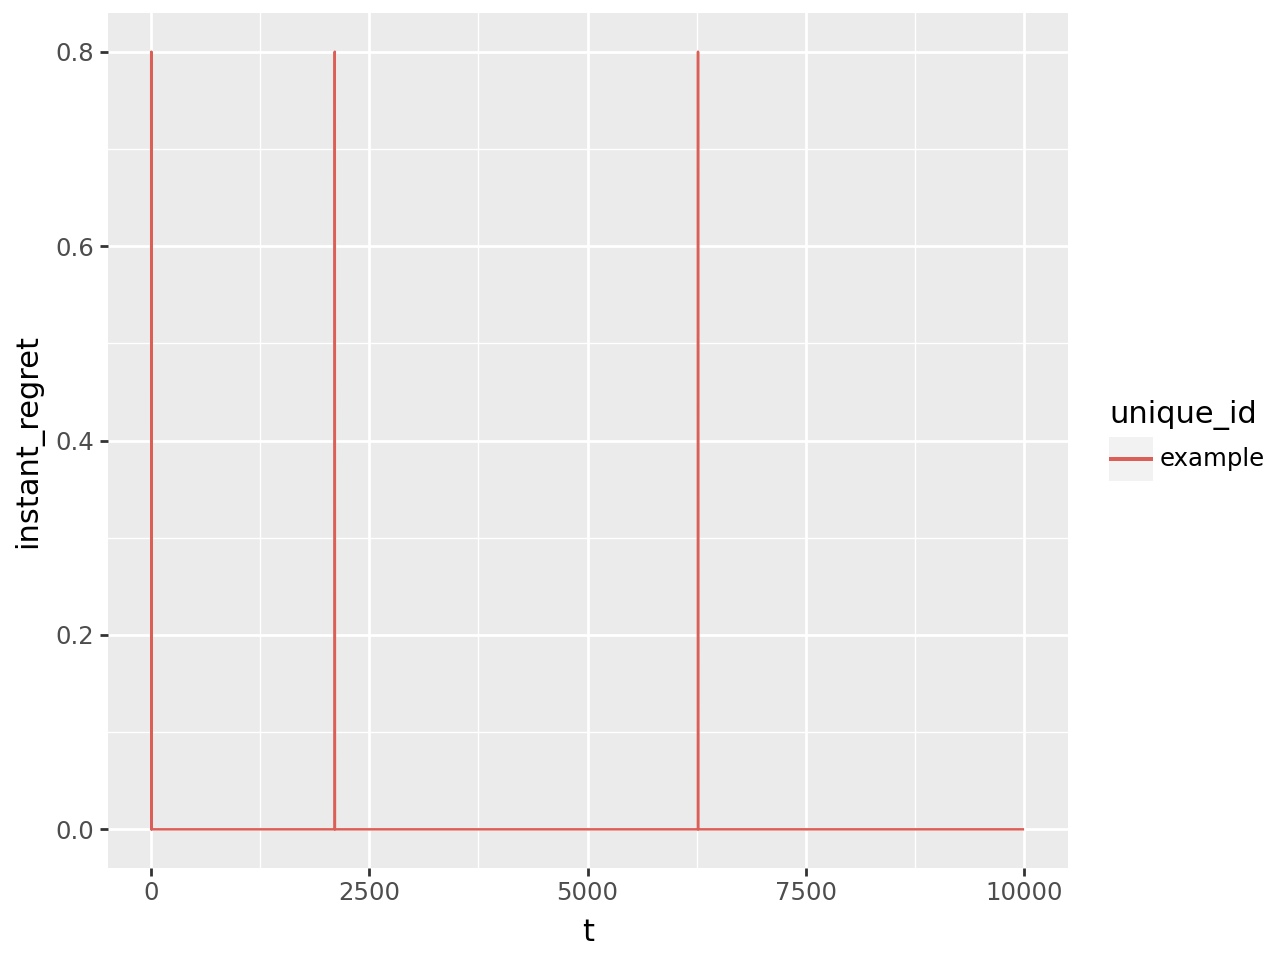

In [38]:
p = (gg.ggplot(experiment.results)
     + gg.aes(x='t', y='instant_regret', colour='unique_id')
     + gg.geom_line())
print(p)